### 1. 用全连接神经网络判断数字

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pylab as plt
%matplotlib inline

In [2]:

input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [4]:
# 加载MNIST数据 
train_dataset = torchvision.datasets.MNIST(root='../data/MNIST_data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../data/MNIST_data', 
                                          train=False, 
                                          transform=transforms.ToTensor())



In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

torch.Size([100, 1, 28, 28])
torch.Size([100])


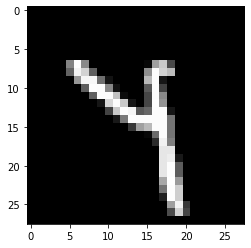

In [6]:
for i,(images,labels) in  enumerate(train_loader):
    plt.imshow(images[0,0,:,:],cmap='gray');
    if i > 1:
        print(images.shape)
        print(labels.shape)
        break

In [7]:

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [8]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [9]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  


In [10]:

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.reshape(-1, 28*28)      

        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/600], Loss: 0.4234
Epoch [1/5], Step [200/600], Loss: 0.3023
Epoch [1/5], Step [300/600], Loss: 0.2520
Epoch [1/5], Step [400/600], Loss: 0.3481
Epoch [1/5], Step [500/600], Loss: 0.3420
Epoch [1/5], Step [600/600], Loss: 0.1613
Epoch [2/5], Step [100/600], Loss: 0.4105
Epoch [2/5], Step [200/600], Loss: 0.2096
Epoch [2/5], Step [300/600], Loss: 0.1796
Epoch [2/5], Step [400/600], Loss: 0.2246
Epoch [2/5], Step [500/600], Loss: 0.1260
Epoch [2/5], Step [600/600], Loss: 0.0974
Epoch [3/5], Step [100/600], Loss: 0.1663
Epoch [3/5], Step [200/600], Loss: 0.0961
Epoch [3/5], Step [300/600], Loss: 0.1397
Epoch [3/5], Step [400/600], Loss: 0.1200
Epoch [3/5], Step [500/600], Loss: 0.2421
Epoch [3/5], Step [600/600], Loss: 0.1765
Epoch [4/5], Step [100/600], Loss: 0.1747
Epoch [4/5], Step [200/600], Loss: 0.1071
Epoch [4/5], Step [300/600], Loss: 0.0898
Epoch [4/5], Step [400/600], Loss: 0.1309
Epoch [4/5], Step [500/600], Loss: 0.0748
Epoch [4/5], Step [600/600], Loss:

In [11]:

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the network on the 10000 test images: 97.19 %


### 2.  用全连接神经网络判断服饰类型

In [13]:
# MNIST dataset 
train_dataset = torchvision.datasets.FashionMNIST(root='../data/fasion_mnist', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.FashionMNIST(root='../data/fasion_mnist', 
                                          train=False, 
                                          transform=transforms.ToTensor())



In [14]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

torch.Size([100, 1, 28, 28])
torch.Size([100])


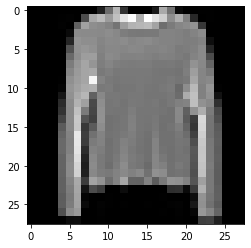

In [15]:
for i,(images,labels) in  enumerate(train_loader):
    plt.imshow(images[0,0,:,:],cmap='gray');
    if i > 1:
        print(images.shape)
        print(labels.shape)
        break

In [16]:
model_fashion = NeuralNet(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_fashion.parameters(), lr=learning_rate)  


In [17]:

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.reshape(-1, 28*28)      

        outputs = model(images)
        loss = criterion(outputs, labels)
        

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 11.9489
Epoch [1/5], Step [200/600], Loss: 13.1135
Epoch [1/5], Step [300/600], Loss: 13.5063
Epoch [1/5], Step [400/600], Loss: 12.8764
Epoch [1/5], Step [500/600], Loss: 14.5751
Epoch [1/5], Step [600/600], Loss: 12.2308
Epoch [2/5], Step [100/600], Loss: 10.4673
Epoch [2/5], Step [200/600], Loss: 12.6565
Epoch [2/5], Step [300/600], Loss: 12.4745
Epoch [2/5], Step [400/600], Loss: 10.6528
Epoch [2/5], Step [500/600], Loss: 9.5800
Epoch [2/5], Step [600/600], Loss: 11.9939
Epoch [3/5], Step [100/600], Loss: 12.0565
Epoch [3/5], Step [200/600], Loss: 12.3040
Epoch [3/5], Step [300/600], Loss: 10.8829
Epoch [3/5], Step [400/600], Loss: 12.0260
Epoch [3/5], Step [500/600], Loss: 11.3427
Epoch [3/5], Step [600/600], Loss: 14.3680
Epoch [4/5], Step [100/600], Loss: 11.5003
Epoch [4/5], Step [200/600], Loss: 11.8644
Epoch [4/5], Step [300/600], Loss: 13.1873
Epoch [4/5], Step [400/600], Loss: 13.0958
Epoch [4/5], Step [500/600], Loss: 11.6420
Epoch [4/5],

In [18]:

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the network on the 10000 test images: 7.65 %


### 3. 用卷积神经网络判断服饰

In [19]:

num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [20]:

class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.cnn_layer = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(14*14*32, num_classes)
        
    def forward(self, x):
        out = self.cnn_layer(x)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out


In [21]:
model_fashion_cnn = ConvNet(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_fashion_cnn.parameters(), lr=learning_rate)

In [22]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        outputs = model_fashion_cnn(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/600], Loss: 0.4598
Epoch [1/5], Step [200/600], Loss: 0.5903
Epoch [1/5], Step [300/600], Loss: 0.3828
Epoch [1/5], Step [400/600], Loss: 0.4964
Epoch [1/5], Step [500/600], Loss: 0.3470
Epoch [1/5], Step [600/600], Loss: 0.3416
Epoch [2/5], Step [100/600], Loss: 0.3006
Epoch [2/5], Step [200/600], Loss: 0.3538
Epoch [2/5], Step [300/600], Loss: 0.5296
Epoch [2/5], Step [400/600], Loss: 0.2037
Epoch [2/5], Step [500/600], Loss: 0.1881
Epoch [2/5], Step [600/600], Loss: 0.2037
Epoch [3/5], Step [100/600], Loss: 0.3125
Epoch [3/5], Step [200/600], Loss: 0.3285
Epoch [3/5], Step [300/600], Loss: 0.2498
Epoch [3/5], Step [400/600], Loss: 0.2975
Epoch [3/5], Step [500/600], Loss: 0.3747
Epoch [3/5], Step [600/600], Loss: 0.3266
Epoch [4/5], Step [100/600], Loss: 0.3912
Epoch [4/5], Step [200/600], Loss: 0.3139
Epoch [4/5], Step [300/600], Loss: 0.2289
Epoch [4/5], Step [400/600], Loss: 0.2697
Epoch [4/5], Step [500/600], Loss: 0.2292
Epoch [4/5], Step [600/600], Loss:

In [23]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model_fashion_cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Test Accuracy of the model on the 10000 test images: 90.06 %
